In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore')

## Billionaires

In [42]:
sky = Table.read_table('data/skyscrapers.csv')
sky_pivot = sky.pivot('material','city','completed',min)
composite_oldest_buildings = sky_pivot.select('city','composite')
composite_oldest_buildings
#composite_oldest_buildings.sort('composite').where('composite',are.above(0))

city,composite
Atlanta,1987
Atlantic City,0
Austin,0
Boston,0
Charlotte,0
Chicago,1972
Cincinnati,2011
Cleveland,1991
Dallas,1985
Denver,1983


In [ ]:
sky

In [31]:
sky_composite = sky.where('material','composite') # atlanta skyscrapers
# composite skyscrapers in Atlanta

In [38]:
composite_oldest_buildings.join(['composite','city'],sky_composite,['completed','city'])

composite,city,name,material,height
1972,Chicago,AMA Plaza,composite,211.84
1972,New Orleans,One Shell Square,composite,212.45
1972,New York City,One Astor Plaza,composite,227.08
1972,San Francisco,Transamerica Pyramid,composite,260
1973,Minneapolis,IDS Tower,composite,241.38
1978,Houston,LyondellBassell Tower,composite,206.8
1983,Denver,Wells Fargo Center,composite,212.75
1983,Miami,Southeast Financial Center,composite,232.8
1984,Seattle,Columbia Center,composite,284.38
1985,Dallas,Bank of America Plaza,composite,280.72


In [2]:
billionaires = Table.read_table('data/billionaires.csv')
billionaires

name,net worth,citizenship,industry
Jeff Bezos,115739645754,United States,Technology
Bill Gates,115488591742,United States,Technology
Bernard Arnault,102244728472,France,Consumer
Warren Buffett,89408278188,United States,Diversified
Mark Zuckerberg,83053011017,United States,Technology
Amancio Ortega,73839366133,Spain,Retail
Larry Page,69933009751,United States,Technology
Sergey Brin,67825250468,United States,Technology
Carlos Slim,62527178289,Mexico,Diversified
Charles Koch,61046822719,United States,Industrial


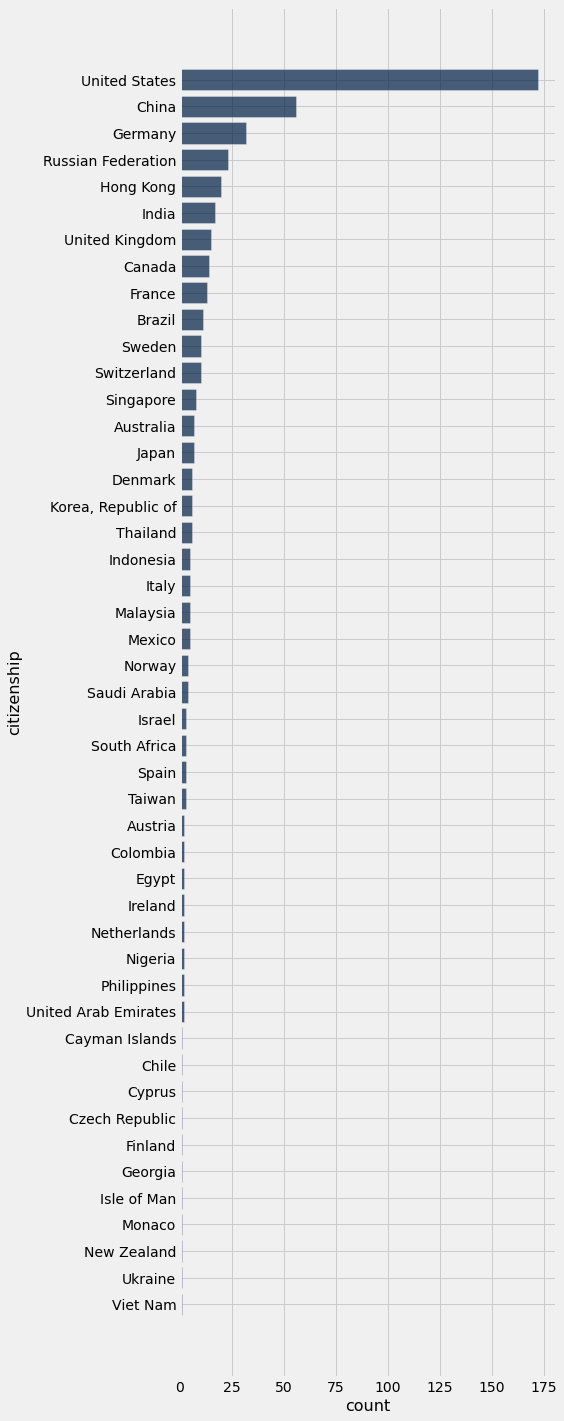

In [43]:
(billionaires.group('citizenship')
             .sort(1, descending=True)
             .barh('citizenship'))

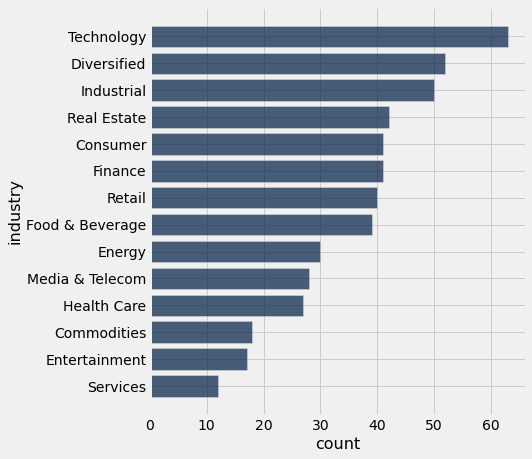

In [44]:
(billionaires.group('industry')
             .sort(1, descending=True)
             .barh('industry'))

In [47]:
billionaires.pivot('industry', 'citizenship').show()

citizenship,Commodities,Consumer,Diversified,Energy,Entertainment,Finance,Food & Beverage,Health Care,Industrial,Media & Telecom,Real Estate,Retail,Services,Technology
Australia,2,0,0,0,0,0,0,0,1,0,2,0,0,2
Austria,0,0,0,0,1,0,1,0,0,0,0,0,0,0
Brazil,1,0,0,0,0,5,3,0,1,0,0,0,0,1
Canada,1,0,0,1,0,0,1,0,0,7,0,3,0,1
Cayman Islands,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Chile,1,0,0,0,0,0,0,0,0,0,0,0,0,0
China,1,6,2,3,0,1,5,6,4,0,7,2,4,15
Colombia,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Cyprus,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Czech Republic,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [48]:
countries = Table.read_table('data/countries.csv')
countries

Continent,Country
Africa,Algeria
Africa,Angola
Africa,Benin
Africa,Botswana
Africa,Burkina
Africa,Burundi
Africa,Cameroon
Africa,Cape Verde
Africa,Central African Republic
Africa,Chad


In [49]:
countries.where('Continent', 'North America')

Continent,Country
North America,Antigua and Barbuda
North America,Bahamas
North America,Barbados
North America,Belize
North America,Canada
North America,Cayman Islands
North America,Costa Rica
North America,Cuba
North America,Dominica
North America,Dominican Republic


In [50]:
billionaires = billionaires.join('citizenship', countries, 'Country')
billionaires

citizenship,name,net worth,industry,Continent
Australia,Gina Rinehart,19984845036,Commodities,Oceania
Australia,Andrew Forrest,10221458789,Commodities,Oceania
Australia,Harry Triguboff,9467000000,Real Estate,Oceania
Australia,Scott Farquhar,9335988154,Technology,Oceania
Australia,Mike Cannon-Brookes,9335988154,Technology,Oceania
Australia,Frank Lowy,6655432824,Real Estate,Oceania
Australia,Anthony Pratt,6566000000,Industrial,Oceania
Austria,Dietrich Mateschitz,12251315379,Food & Beverage,Europe
Austria,Johann Graf,6509183360,Entertainment,Europe
Brazil,Jorge Paulo Lemann,23056345424,Food & Beverage,South America


In [52]:
billionaires.pivot('Continent','industry')

industry,Africa,Asia,Europe,North America,Oceania,South America
Commodities,0,7,1,6,2,2
Consumer,0,10,17,14,0,0
Diversified,2,27,13,10,0,0
Energy,0,12,1,17,0,0
Entertainment,0,4,4,9,0,0
Finance,0,4,1,29,1,6
Food & Beverage,1,11,9,14,0,4
Health Care,0,11,10,6,0,0
Industrial,2,21,21,4,1,1
Media & Telecom,2,3,4,19,0,0


In [53]:
ceos = Table.read_table('data/ceo.csv')
ceos

company,ceo,party,amount
3M Co,Bob Ulrich,200,8500
3M Co,Linda Alvarado,100,11244.6
3M Co,Robert Ulrich,200,591450
AES Corporation,Andres Gluski,100,6000
AES Corporation,Charles Rossotti,100,2500
AES Corporation,Charles Rossotti,200,1000
AES Corporation,John Koskinen,100,19000
AES Corporation,Kristina Johnson,100,28480
AES Corporation,Philip Lader,100,2500
AES Corporation,Philip Odeen,100,750


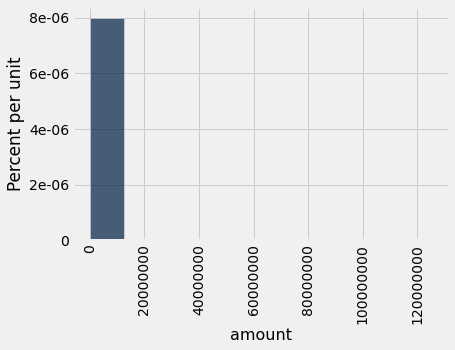

In [54]:
ceos.hist('amount')

In [ ]:
"125,273,000"

In [55]:
ceos.sort('amount', descending=True)

company,ceo,party,amount
Hewlett-Packard Co,Margaret Whitman,200,1.25273e+08
Caterpillar Inc,Jon Huntsman,200,1.27686e+07
Las Vegas Sands,Sheldon Adelson,200,6.20425e+06
Las Vegas Sands,Sheldon g Adelson,200,5e+06
Visteon,Harry Wilson,200,4.0304e+06
Yahoo! Inc,Daniel Loeb,200,2.51255e+06
YRC Worldwide Inc,Matthew Doheny,200,1.47332e+06
Charles Schwab Corp,Charles Schwab,200,1.2364e+06
DTE Energy,James Nicholson,200,986850
Limited Brance,Leslie Wexner,200,942800


In [56]:
ceos.sort('amount', descending=False)

company,ceo,party,amount
Bristol-Myers Squibb Company,Robert Williams,100,9
Amgen Inc,Gil Omenn,100,10
Bristol-Myers Squibb Company,Michael Grobstein,100,10
Caterpillar Inc,Leon Patten,100,10
Caseys General Stores,Richard Wilkey,100,23
AK Steel,William Gerber,200,25
Hollyfrontier Corporation,Matthews Clifton,100,25
Nordstrom Inc,Alison Winter,100,25
Calpine,Rob Mosbacher,100,35
CF Industries Holdings,John Johnson,100,40


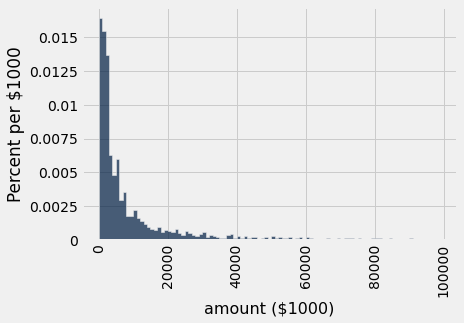

In [57]:
ceos.hist('amount', bins=np.arange(0, 1e5, 1e3), unit='$1000')

In [58]:
b_donations = billionaires.join('name', ceos, 'ceo')
b_donations.show()

name,citizenship,net worth,industry,Continent,company,party,amount
Barry Diller,United States,5479965153,Technology,North America,Coca-Cola Co,100,107500
Carl Icahn,United States,20515698449,Diversified,North America,CVR Energy,100,3000
Carl Icahn,United States,20515698449,Diversified,North America,CVR Energy,200,225900
Charles Dolan,United States,5387774353,Media & Telecom,North America,Cablevision,100,39400
Charles Dolan,United States,5387774353,Media & Telecom,North America,Cablevision,200,107000
Charles Johnson,United States,4587892463,Finance,North America,Franklin Resources,200,858000
Charles Koch,United States,61046822719,Industrial,North America,Assurant,100,1500
Charles Koch,United States,61046822719,Industrial,North America,Assurant,200,25400
Charles Schwab,United States,9063879795,Finance,North America,Charles Schwab Corp,100,1800
Charles Schwab,United States,9063879795,Finance,North America,Charles Schwab Corp,200,1.2364e+06


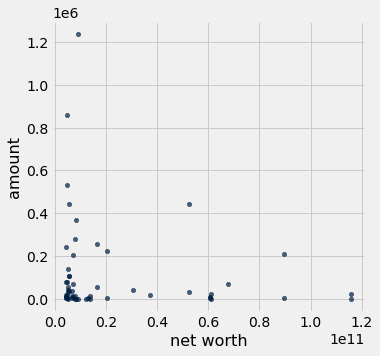

In [59]:
b_donations.where('amount', are.below(6e6)).scatter('net worth', 'amount')

In [ ]:
6,000,000,000

In [63]:
donation_prop = (b_donations.column('amount')*1000) / b_donations.column('net worth')
b_donations = b_donations.with_column('Contribution%', donation_prop)
b_donations = b_donations.sort('amount', descending=True)
b_donations.set_format('Contribution%', PercentFormatter)
b_donations.sort('Contribution%', descending = True)

name,citizenship,net worth,industry,Continent,company,party,amount,Contribution%
Charles Johnson,United States,4587892463,Finance,North America,Franklin Resources,200,858000,18.70%
Sheldon Adelson,United States,38008857087,Entertainment,North America,Las Vegas Sands,200,6.20425e+06,16.32%
Charles Schwab,United States,9063879795,Finance,North America,Charles Schwab Corp,200,1.2364e+06,13.64%
Kelcy Warren,United States,4595072119,Energy,North America,Energy Transfer,200,529886,11.53%
Ray Hunt,United States,5421192714,Energy,North America,PepsiCo Inc,200,442364,8.16%
Reed Hastings,United States,4569628489,Technology,North America,Facebook,100,241700,5.29%
Richard Kinder,United States,8398076785,Energy,North America,Kinder Morgan,200,368000,4.38%
John Malone,United States,8069296402,Media & Telecom,North America,Liberty Global,200,280050,3.47%
Henry Kravis,United States,7280344087,Finance,North America,First Data Corporation,200,206349,2.83%
Walter Scott,United States,5253083416,Energy,North America,Berkshire Hathaway Inc,200,138400,2.63%


In [ ]:
.02 / 100 * 20000

## Meteorites

In [64]:
meteorites = Table.read_table('data/meteorites_na.csv')
meteorites

name,class,mass,how,year,lat,lon
Abee,EH4,107000,Fell,1952,54.2167,-113
Acapulco,Acapulcoite,1914,Fell,1976,16.8833,-99.9
Allegan,H5,32000,Fell,1899,42.5333,-85.8833
Allende,CV3,2e+06,Fell,1969,26.9667,-105.317
Andover,L6,3200,Fell,1898,44.6167,-70.75
Archie,H6,5070,Fell,1932,38.5,-94.3
Ash Creek,L6,9500,Fell,2009,31.805,-97.01
Atemajac,L6,94.2,Fell,1896,20.0667,-103.667
Athens,LL6,265,Fell,1933,34.75,-87
Atoka,L6,1384.2,Fell,1945,34.3167,-96.15


In [65]:
meteorites.group('class').sort(1, descending=True)

class,count
H5,293
L6,278
H4,186
L5,136
H6,132
"Iron, IIIAB",124
L4,53
OC,43
"Iron, IIAB",42
"Iron, IAB-MG",37


In [66]:
meteorites.group('how')

how,count
Fell,181
Found,1626


In [67]:
meteorites.group('how', np.average)

how,name average,class average,mass average,year average,lat average,lon average
Fell,,,38316.9,1926.62,37.2264,-93.3681
Found,,,132638,1958.22,36.206,-103.928


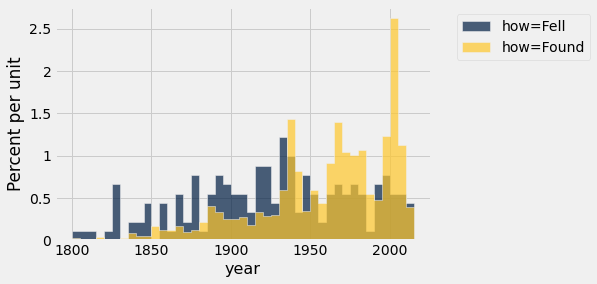

In [68]:
meteorites.hist('year', bins=np.arange(1800, 2020, 5), group='how')

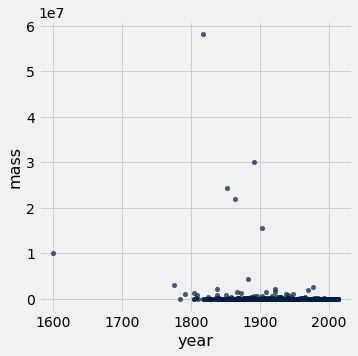

In [69]:
meteorites.scatter('year', 'mass')

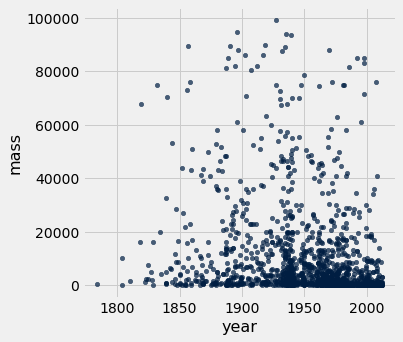

In [70]:
meteorites.where('mass', are.below(1e5)).scatter('year', 'mass')

In [71]:
new_fell = meteorites.where('how', 'Fell').where('year', are.above(1950))
new_found  = meteorites.where('how', 'Found').where('year', are.above(1950))
new_found

name,class,mass,how,year,lat,lon
Abajo,H5,331,Found,1982,26.8,-105.417
Abbott,H3-6,21100,Found,1951,36.3,-104.283
Ackerly,L5,3046,Found,1995,32.5903,-101.772
Acomita,"Pallasite, PMG",3956,Found,1962,35.05,-107.567
Acuña,"Iron, IIIAB",217700,Found,1981,29.3167,-100.967
Akron (1961),L6,4000,Found,1961,40.15,-103.167
Albion,"Iron, IVA",12280,Found,1966,46.8333,-117.25
Aldama (a),"Iron, IIIAB",11000,Found,1985,28.8333,-105.867
Aldama (b),H5,66.5,Found,1996,25.05,-106
Alkali,H6,30.47,Found,1998,37.8667,-117.4


## Maps

In [72]:
Marker.map_table(new_fell.select('lat', 'lon', 'name'))

In [73]:
Circle.map_table(new_found.select('lat', 'lon', 'name'), radius=10)

## Bikes

If you loaded the meteorites dataset above, now might be a good time to restart your kernel, run the cell at the top of the notebook, then come back here. 

The bike datasets in this section is big, and could lead to kernel crashes.

In [ ]:
trip = Table.read_table('data/trip.csv')
trip

In [ ]:
commute = trip.where('Duration', are.below(1800))
commute.hist('Duration')

In [ ]:
commute.hist('Duration', bins=60, unit='second')

In [ ]:
# Percent of people who have a ride duration between 500 and 250 seconds
(500-250) * 0.15 

In [ ]:
starts = commute.group('Start Station').sort('count', descending=True)
starts

In [ ]:
commute.pivot('Start Station', 'End Station')

In [ ]:
duration = trip.select('Start Station', 'End Station', 'Duration')
duration

In [ ]:
shortest = duration.group(['Start Station', 'End Station'], min).relabeled('Duration min', 'Minimum Duration')
shortest

In [ ]:
from_cc = shortest.where('Start Station', are.containing('Civic Center BART')).sort('Minimum Duration')
from_cc

## Maps, again

In [ ]:
stations = Table.read_table('data/station.csv')
stations

In [ ]:
Marker.map_table(stations.select('lat', 'long', 'name'))

In [ ]:
sf = stations.where('landmark', 'San Francisco')
Circle.map_table(sf.select('lat', 'long', 'name'), color='green', radius=15)

## Extra practice

### Write a Python expression below each of the following descriptions that computes its value. You may use more than one line.

In [ ]:
# The name of the station where the most rentals ended (assume no ties).




In [ ]:
# The number of stations for which the average duration ending at that station was more than 10 minutes.





In [ ]:
# The number of stations that have more than 500 starts AND more than 500 ends





In [ ]:
# The name of the station where the most rentals ended (assume no ties).
# First, find end counts
# Then, find the station with the highest end count
trip.group('End').sort('count', descending=True).column(0).item(0)

In [ ]:
# The number of stations for which the average duration ending at that station was more than 10 minutes.

# First, find the average end time for each station
# Then, keep the ones above 10 minutes
# Then, count them
trip.group('End', np.average).where(2, are.above(10*60)).num_rows

In [ ]:
# The number of stations that have more than 500 starts AND more than 500 ends.

# First, group the trip on starts and ends, separately
# Then, join the two grouped tables
# Then, count the number of rows where the stations' start and end counts are bove 500
start_counts, end_counts = trip.group('Start').relabeled('count', 'Start Count'), trip.group('End').relabeled('count', 'End Count')
start_counts.join('Start', end_counts, 'End').where(
    'Start Count', are.above(500)).where('End Count', are.above(500)).num_rows